In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math

Etape 1  : Discretisation du système d'équation différentielles 

    new_value_time = time[-1] + step
    new_value_susceptible = (-beta*susceptible[-1] * infected[-1] )*step + susceptible[-1]
    new_value_infected = ((beta*susceptible[-1]*infected[-1]) - (gama*infected[-1]) - (mu*infected[-1]))*step + infected[-1]
    new_value_recovered = (gama*infected[-1])*step + recovered[-1]
    new_value_deceased = (mu*infected[-1])*step + deceased[-1] 

Etape 1 : fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

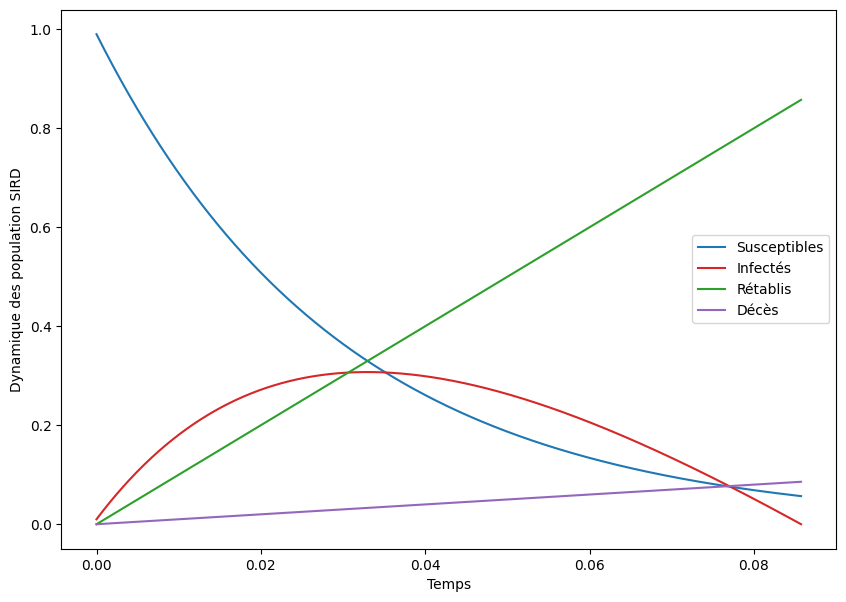

In [32]:

def solution_epidemiologique_sird(beta, gama, mu, step, nb_jours):
    time = [0]
    susceptible = [0.99]
    infected = [0.01]
    recovered = [0] 
    deceased = [0]
    
    (beta, gama, mu) = (0.5, 0.15, 0.015)
    nb_points = int(nb_jours / step)
    step = 0.0001

    for _ in range(1, nb_points):
        new_value_time = time[-1] + step
        new_value_susceptible = (-beta*susceptible[-1] * infected[-1] )*step + susceptible[-1]
        new_value_infected = ((beta*susceptible[-1]*infected[-1]) - (gama*infected[-1]) - (mu*infected[-1]))*step + infected[-1]
        new_value_recovered = (gama*infected[-1])*step + recovered[-1]
        new_value_deceased = (mu*infected[-1])*step + deceased[-1] 

        time.append(new_value_deceased)
        susceptible.append(new_value_susceptible)
        infected.append(new_value_infected)
        recovered.append(new_value_recovered)
        deceased.append(new_value_deceased)

    return time, susceptible, infected, recovered, deceased

def plot_sird_data(time, susceptible, infected, recovered, deceased):
    plt.figure(figsize=(10, 7))
    plt.plot(time, susceptible, "#1f77b4", label='Susceptibles')
    plt.plot(time, infected,  "#d62728", label='Infectés' )
    plt.plot(time, recovered, "#2ca02c", label='Rétablis' )
    plt.plot(time, deceased, "#9467bd", label='Décès'  )
    plt.legend()
    plt.xlabel('Temps')
    plt.ylabel('Dynamique des population SIRD')
    

time, susceptible, infected, recovered, deceased = solution_epidemiologique_sird(0.3, 0.15, 0.015, 0.0001, 90)

plot_sird_data(time, susceptible, infected, recovered, deceased)




susceptible_color = "#1f77b4"  # Bleu (bonne lisibilité)

infected_color = "#d62728"     # Rouge vif (attire l'attention)

recovered_color = "#2ca02c"    # Vert (évoque la guérison)

deceased_color = "#9467bd"     # Violet (contraste avec les autres)

In [33]:
def solution_epidemiologique_sird_2(beta, gama, mu, step, nb_jours):
    time = [0]
    susceptible = [0.99]
    infected = [0.01]
    recovered = [0] 
    deceased = [0]
    
    (beta, gama, mu) = (0.5, 0.15, 0.015)
    #nb_points = int(nb_jours / step)
    step = 0.0001

    for _ in range(1, nb_jours):
        new_value_time = time[-1] + step
        new_value_susceptible = (-beta*susceptible[-1] * infected[-1] )*step + susceptible[-1]
        new_value_infected = ((beta*susceptible[-1]*infected[-1]) - (gama*infected[-1]) - (mu*infected[-1]))*step + infected[-1]
        new_value_recovered = (gama*infected[-1])*step + recovered[-1]
        new_value_deceased = (mu*infected[-1])*step + deceased[-1] 

        time.append(new_value_deceased)
        susceptible.append(new_value_susceptible)
        infected.append(new_value_infected)
        recovered.append(new_value_recovered)
        deceased.append(new_value_deceased)

    return time, susceptible, infected, recovered, deceased


    

time, susceptible, infected, recovered, deceased = solution_epidemiologique_sird_2(0.5, 0.15, 0.015, 0.0001, 90)



Etape 3 : Ajustement des paramètres du modèles sird avec des données empiriques 

In [34]:


df = pd.read_csv(r"C:\Users\franc\Documents\positive_sird_dataset.csv")

print(df)

time_real = df['Jour'].values
susceptible_real = df["Susceptibles"].values
infected_real = df["Infectés"].values
recovered_real = df["Rétablis"].values
deceased_real = df["Décès"].values

df 


    Jour  Susceptibles  Infectés  Rétablis     Décès
0      0      0.998894  0.003197  0.002455  0.004622
1      1      0.991526  0.000409  0.010702  0.008857
2      2      0.982164  0.011018  0.004865  0.001515
3      3      0.988132  0.008969  0.006308  0.003571
4      4      0.971090  0.007307  0.005403  0.004894
..   ...           ...       ...       ...       ...
85    85      0.072998  0.004650  0.829414  0.079243
86    86      0.077714  0.005786  0.846965  0.085430
87    87      0.073599  0.010464  0.844571  0.084902
88    88      0.074212  0.004219  0.836580  0.076309
89    89      0.070468  0.003284  0.844484  0.094831

[90 rows x 5 columns]


,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,0.002455,0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,0.001515
3,3,0.988132,0.008969,0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894
...,...,...,...,...,...
85,85,0.072998,0.004650,0.829414,0.079243
86,86,0.077714,0.005786,0.846965,0.085430
87,87,0.073599,0.010464,0.844571,0.084902
88,88,0.074212,0.004219,0.836580,0.076309


Affichage des données prédites SIRD

In [35]:
time, susceptible, infected, recovered, deceased = solution_epidemiologique_sird_2(0.5, 0.15, 0.015, 0.0001, 90)
print("Temps: ", time[:5])  # Affiche les 10 premiers temps
print("Susceptibles: ", susceptible[:5])  # Affiche les 10 premiers pour susceptibles
print("Infectés: ", infected[:5])  # Affiche les 10 premiers pour infectés
print("Rétablis: ", recovered[:5])  # Affiche les 10 premiers pour rétablis
print("Décès: ", deceased[:5])  # Affiche les 10 premiers pour décès

Temps:  [0, 1.5e-08, 3.0000495e-08, 4.500148501596373e-08, 6.000297006385544e-08]
Susceptibles:  [0.99, 0.989999505, 0.9899990099839125, 0.9899985149517371, 0.9899980199034731]
Infectés:  [0.01, 0.01000033, 0.010000660010642492, 0.010000990031927802, 0.010001320063856258]
Rétablis:  [0, 1.5000000000000002e-07, 3.0000495000000005e-07, 4.5001485015963745e-07, 6.000297006385545e-07]
Décès:  [0, 1.5e-08, 3.0000495e-08, 4.500148501596373e-08, 6.000297006385544e-08]


In [36]:


def mse(prediction, real_value):
    if len(prediction) != len(real_value):
        raise ValueError("Les longueurs des listes de prédictions et des valeurs réelles ne correspondent pas.")
    return np.mean((np.array(prediction) - np.array(real_value))**2)

time, susceptible, infected, recovered, deceased = solution_epidemiologique_sird_2(0.5, 0.15, 0.015, 0.0001, 90)

mse_susceptible = mse(susceptible, susceptible_real)
mse_infected = mse(infected, infected_real)
mse_recovered = mse(recovered, recovered_real)
mse_deceased = mse(deceased, deceased_real)

mse_total = np.mean([mse_susceptible, mse_infected, mse_recovered, mse_deceased])

print(f"MSE pour les susceptibles : {mse_susceptible }")
print(f"MSE pour les infectés : {mse_infected}")
print(f"MSE pour les rétablis : {mse_recovered }")
print(f"MSE pour les décès : {mse_deceased}")
print(f"MSE totale: {mse_total}")

MSE pour les susceptibles : 0.5511841623846369
MSE pour les infectés : 0.015391482387583519
MSE pour les rétablis : 0.3822823247153857
MSE pour les décès : 0.0038981400639639947
MSE totale: 0.2381890273878925


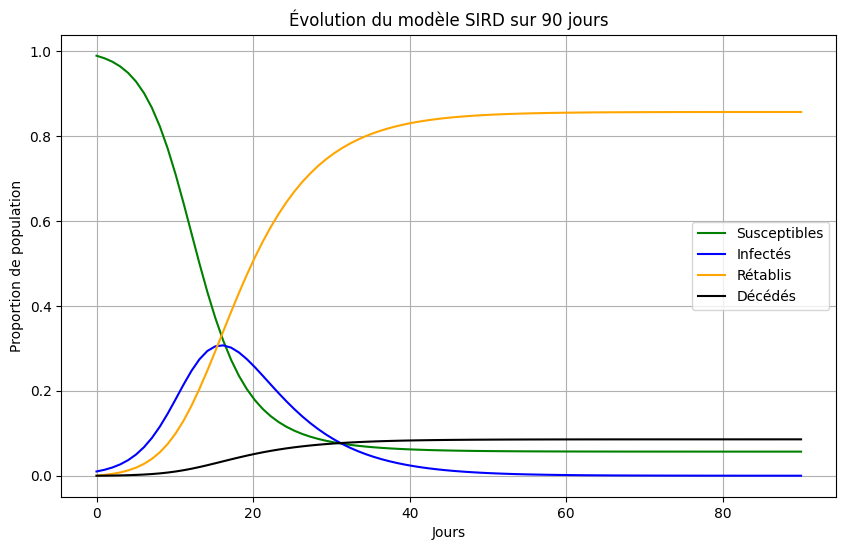

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def solution_epidemiologique_sird(beta, gama, mu, step, nb_jours):
    time = [0]
    susceptible = [0.99]
    infected = [0.01]
    recovered = [0] 
    deceased = [0]
    
    nb_points = int(nb_jours / step)

    for _ in range(1, nb_points):
        new_value_time = time[-1] + step
        new_value_susceptible = (-beta * susceptible[-1] * infected[-1]) * step + susceptible[-1]
        new_value_infected = ((beta * susceptible[-1] * infected[-1]) - (gama * infected[-1]) - (mu * infected[-1])) * step + infected[-1]
        new_value_recovered = (gama * infected[-1]) * step + recovered[-1]
        new_value_deceased = (mu * infected[-1]) * step + deceased[-1] 

        time.append(new_value_time)
        susceptible.append(new_value_susceptible)
        infected.append(new_value_infected)
        recovered.append(new_value_recovered)
        deceased.append(new_value_deceased)

    # Interpolation pour ramener toutes les données sur 90 jours
    real_days = np.linspace(0, nb_jours, 90)  # 90 valeurs de 0 à nb_jours
    interpolated_susceptible = np.interp(real_days, time, susceptible)
    interpolated_infected = np.interp(real_days, time, infected)
    interpolated_recovered = np.interp(real_days, time, recovered)
    interpolated_deceased = np.interp(real_days, time, deceased)

    return real_days, interpolated_susceptible, interpolated_infected, interpolated_recovered, interpolated_deceased

# Test du modèle avec 90 jours
beta, gama, mu = 0.5, 0.15, 0.015
step = 0.0001
nb_jours = 90

days_sim, susceptible_sim, infected_sim, recovered_sim, deceased_sim = solution_epidemiologique_sird(beta, gama, mu, step, nb_jours)

# Tracé des résultats simulés
plt.figure(figsize=(10, 6))
plt.plot(days_sim, susceptible_sim, label="Susceptibles", color="green")
plt.plot(days_sim, infected_sim, label="Infectés", color="blue")
plt.plot(days_sim, recovered_sim, label="Rétablis", color="orange")
plt.plot(days_sim, deceased_sim, label="Décédés", color="black")
plt.xlabel("Jours")
plt.ylabel("Proportion de population")
plt.title("Évolution du modèle SIRD sur 90 jours")
plt.legend()
plt.grid()
plt.show()


In [38]:
import pandas as pd
df = pd.read_csv(r"C:\Users\franc\Documents\positive_sird_dataset.csv")

print(df)

time_real = df['Jour'].values
susceptible_real = df["Susceptibles"].values
infected_real = df["Infectés"].values
recovered_real = df["Rétablis"].values
deceased_real = df["Décès"].values

df 

    Jour  Susceptibles  Infectés  Rétablis     Décès
0      0      0.998894  0.003197  0.002455  0.004622
1      1      0.991526  0.000409  0.010702  0.008857
2      2      0.982164  0.011018  0.004865  0.001515
3      3      0.988132  0.008969  0.006308  0.003571
4      4      0.971090  0.007307  0.005403  0.004894
..   ...           ...       ...       ...       ...
85    85      0.072998  0.004650  0.829414  0.079243
86    86      0.077714  0.005786  0.846965  0.085430
87    87      0.073599  0.010464  0.844571  0.084902
88    88      0.074212  0.004219  0.836580  0.076309
89    89      0.070468  0.003284  0.844484  0.094831

[90 rows x 5 columns]


,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,0.002455,0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,0.001515
3,3,0.988132,0.008969,0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894
...,...,...,...,...,...
85,85,0.072998,0.004650,0.829414,0.079243
86,86,0.077714,0.005786,0.846965,0.085430
87,87,0.073599,0.010464,0.844571,0.084902
88,88,0.074212,0.004219,0.836580,0.076309


In [39]:
days_sim, susceptible_sim, infected_sim, recovered_sim, deceased_sim = solution_epidemiologique_sird(beta, gama, mu, step, nb_jours)

print("Temps: ", days_sim[:5])  # Affiche les 10 premiers temps
print("Susceptibles: ", susceptible_sim[:5])  # Affiche les 10 premiers pour susceptibles
print("Infectés: ", infected_sim[:5])  # Affiche les 10 premiers pour infectés
print("Rétablis: ", recovered_sim[:5])  # Affiche les 10 premiers pour rétablis
print("Décès: ", deceased_sim[:5])  # Affiche les 10 premiers pour décès

Temps:  [0.         1.01123596 2.02247191 3.03370787 4.04494382]
Susceptibles:  [0.99       0.98407882 0.97589728 0.96467124 0.94941429]
Infectés:  [0.01       0.01394153 0.01936801 0.02677596 0.03677203]
Rétablis:  [0.         0.00179968 0.00430428 0.00777527 0.0125579 ]
Décès:  [0.         0.00017997 0.00043043 0.00077753 0.00125579]


In [40]:
def ms_e(predire, valeur_reelle):
    if len(predire) != len(valeur_reelle):
        raise ValueError("Les longueurs des listes de prédictions et des valeurs réelles ne correspondent pas.")
    return np.mean((np.array(predire) - np.array(valeur_reelle))**2)

days_sim, susceptible_sim, infected_sim, recovered_sim, deceased_sim = solution_epidemiologique_sird(0.5, 0.15, 0.015, 0.0001, 90)
mse_susceptibles = mse(susceptible_sim, susceptible_real)
mse_infecteds = mse(infected_sim, infected_real)
mse_recovereds = mse(recovered_sim, recovered_real)
mse_deceaseds = mse(deceased_sim, deceased_real)

mse_totals = np.mean([mse_susceptibles, mse_infecteds, mse_recovereds, mse_deceaseds])

print(f"MSE pour les susceptibles : {mse_susceptibles }")
print(f"MSE pour les infectés : {mse_infecteds}")
print(f"MSE pour les rétablis : {mse_recovereds }")
print(f"MSE pour les décès : {mse_deceaseds}")
print(f"MSE totale: {mse_totals}")

MSE pour les susceptibles : 0.03912817484318991
MSE pour les infectés : 0.010374339381021605
MSE pour les rétablis : 0.03995849543817141
MSE pour les décès : 0.00043867486954946163
MSE totale: 0.0224749211329831


La MSE est utilisée pour les problèmes de régression. Elle mesure l'écart entre les valeurs continues réelles et prédites.
La CCE est utilisée pour les problèmes de classification (binaire, multi-classe), où la sortie du modèle est une probabilité pour chaque catégorie possible.
Le modèle SIRD prédit des valeurs continues (comme le nombre de personnes dans chaque catégorie à un moment donné), ce qui en fait un problème de régression. Dans ce type de problème, la MSE est une fonction de coût plus appropriée car elle mesure directement l'écart entre les prédictions du modèle et les valeurs réelles sur une échelle continue.

 la CCE n'est pas adaptée pour traiter des données continues comme dans le cas des populations susceptibles, infectées, rétablies et décédées.

Appliquons le Grid Search pour minimiser la MSE 
Trouvons les valeurs optimales de $\beta$, $\gamma$ et $\mu$

Visualisons sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée

Meilleurs paramètres : best-Beta = 0.3333333333333333, best-Gamma = 0.12666666666666665, best-Mu = 0.011666666666666665, best_mse = 0.0008229847351824829


(array([0.99      , 0.98665596, 0.98267616, 0.97794741, 0.97233958,
        0.96570447, 0.95787517, 0.94866635, 0.93787584, 0.9252881 ,
        0.91068   , 0.89382975, 0.87452929, 0.85260037, 0.82791413,
        0.80041306, 0.77013336, 0.73722468, 0.7019634 , 0.6647554 ,
        0.62612518, 0.58669003, 0.54712094, 0.5080949 , 0.47024588,
        0.43412183, 0.40015417, 0.36864297, 0.33975759, 0.31354983,
        0.28997493, 0.26891591, 0.25020721, 0.23365538, 0.21905549,
        0.20620324, 0.19490302, 0.18497294, 0.17624725, 0.16857726,
        0.161831  , 0.15589229, 0.1506594 , 0.14604361, 0.14196769,
        0.13836455, 0.13517589, 0.13235106, 0.12984601, 0.12762241,
        0.12564687, 0.12389023, 0.122327  , 0.1209349 , 0.11969434,
        0.11858816, 0.11760125, 0.11672029, 0.11593355, 0.11523064,
        0.11460239, 0.11404067, 0.11353829, 0.11308883, 0.11268663,
        0.11232662, 0.11200432, 0.11171572, 0.11145726, 0.11122574,
        0.11101833, 0.1108325 , 0.11066598, 0.11

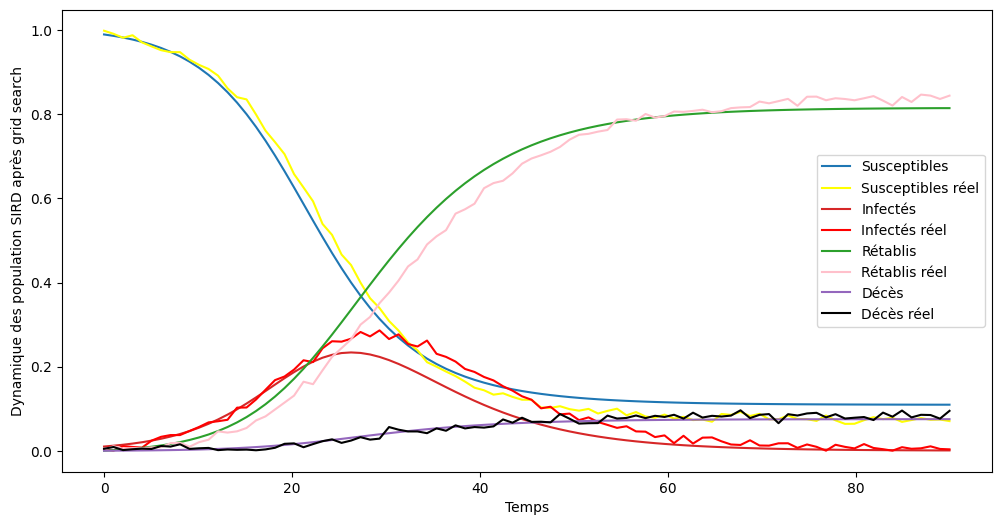

In [41]:
from itertools import product

def grid_search(step, nb_jours, ground_truth):
	
	betas = np.linspace(0.25, 0.5, 4)
	gamas = np.linspace(0.08, 0.15, 4)
	mus =   np.linspace(0.005, 0.015, 4)
	best_beta, best_gama, best_mu  = None, None, None 
	best_mse = float("inf")
	for beta, gama, mu in product(betas, gamas, mus):
		days_sim, susceptible_sim, infected_sim, recovered_sim, deceased_sim = solution_epidemiologique_sird(beta, gama, mu, step, nb_jours)
		mse_susceptibles = mse(susceptible_sim, susceptible_real)
		mse_infecteds = mse(infected_sim, infected_real)
		mse_recovereds = mse(recovered_sim, recovered_real)
		mse_deceaseds = mse(deceased_sim, deceased_real)
		mse_totals = np.mean([mse_susceptibles, mse_infecteds, mse_recovereds, mse_deceaseds])

		
		if mse_totals < best_mse:
			best_mse = mse_totals
			best_beta, best_gama, best_mu = beta, gama, mu
	print(f"Meilleurs paramètres : best-Beta = {best_beta}, best-Gamma = {best_gama}, best-Mu = {best_mu}, best_mse = {best_mse}")
	time, best_susceptible, best_infected, best_recovered, best_deceased = solution_epidemiologique_sird(best_beta, best_gama, best_mu, step, nb_jours)
	plot_data(time, best_susceptible, best_infected, best_recovered, best_deceased, ground_truth)
	return best_susceptible, best_infected, best_recovered, best_deceased, best_mse
def plot_data(time, best_susceptible, best_infected, best_recovered, best_deceased, ground_truth):
	plt.figure(figsize=(12, 6))
	plt.plot(time, best_susceptible, "#1f77b4", label='Susceptibles')
	plt.plot(time, ground_truth["Susceptibles"], c="yellow", label='Susceptibles réel')
	plt.plot(time, best_infected,  "#d62728", label='Infectés' )
	plt.plot(time, ground_truth["Infectés"], c="red", label='Infectés réel')
	plt.plot(time, best_recovered, "#2ca02c", label='Rétablis' )
	plt.plot(time, ground_truth["Rétablis"], c="pink", label='Rétablis réel')
	plt.plot(time, best_deceased, "#9467bd", label='Décès'  )
	plt.plot(time, ground_truth["Décès"], c="black", label='Décès réel')
	plt.legend()
	plt.xlabel('Temps')
	plt.ylabel('Dynamique des population SIRD après grid search')
	plt.show

step = 1 # nombre de points par jours
nb_jours = 90
ground_truth = pd.read_csv(r"C:\Users\franc\Documents\positive_sird_dataset.csv")
grid_search(step, nb_jours, ground_truth)

Le paramètre Ro ou nombre de reproduction de base, représente le nombre moyen de personnes qu’un individu infecté contamine pendant sa période d’infection dans une population entièrement susceptible. Il est donné par : $\ R_0 = \frac{\beta}{\gamma + \mu} \$

β est le taux de transmission,

γ est le taux de récupération,

μ est le taux de mortalité dû à la maladie.

Cas Ro > 1 : Chaque individu infecté contamine plus d’une personne en moyenne.

L’épidémie se propage et croît exponentiellement dans les premières phases.

Si aucune intervention n'est mise en place, une grande partie de la population sera touchée avant que l’immunité collective ne réduise de manière naturelle.

Cas Ro < 1: Chaque individu infecté contamine moins d’une personne en moyenne.

L’épidémie s’éteint progressivement car il n’y a pas assez de nouvelles infections pour maintenir sa propagation.

C’est l’objectif des mesures sanitaires : réduire Ro en dessous de 1 pour contrôler l’épidémie.

 Introduisons une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.


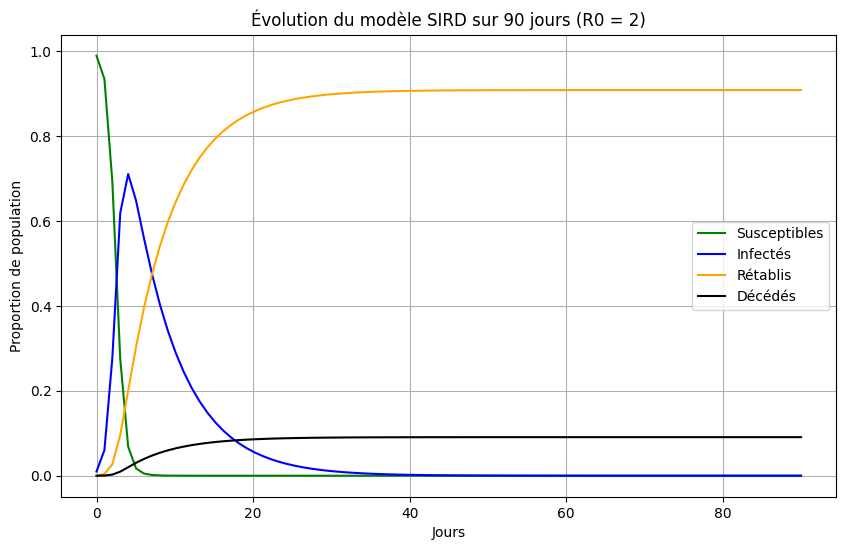

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def solution_epidemiologique_sird_RO(R0, gama, mu, step, nb_jours):
    # Calcul de β à partir de R0
    beta = R0 * (gama + mu)
    
    time = [0]
    susceptible = [0.99]
    infected = [0.01]
    recovered = [0] 
    deceased = [0]
    
    nb_points = int(nb_jours / step)

    for _ in range(1, nb_points):
        new_value_time = time[-1] + step
        new_value_susceptible = (-beta * susceptible[-1] * infected[-1]) * step + susceptible[-1]
        new_value_infected = ((beta * susceptible[-1] * infected[-1]) - (gama * infected[-1]) - (mu * infected[-1])) * step + infected[-1]
        new_value_recovered = (gama * infected[-1]) * step + recovered[-1]
        new_value_deceased = (mu * infected[-1]) * step + deceased[-1] 

        time.append(new_value_time)
        susceptible.append(new_value_susceptible)
        infected.append(new_value_infected)
        recovered.append(new_value_recovered)
        deceased.append(new_value_deceased)

    # Interpolation pour ramener toutes les données sur 90 jours
    real_days = np.linspace(0, nb_jours, 90)  # 90 valeurs de 0 à nb_jours
    interpolated_susceptible = np.interp(real_days, time, susceptible)
    interpolated_infected = np.interp(real_days, time, infected)
    interpolated_recovered = np.interp(real_days, time, recovered)
    interpolated_deceased = np.interp(real_days, time, deceased)

    return real_days, interpolated_susceptible, interpolated_infected, interpolated_recovered, interpolated_deceased

# Définition des paramètres
R0 = 2   # Nombre de reproduction de base
gama = 0.15  # Taux de guérison
mu = 0.015   # Taux de mortalité
step = 0.0001
nb_jours = 90

# Exécution du modèle
days_sim, susceptible_sim, infected_sim, recovered_sim, deceased_sim = solution_epidemiologique_sird(R0, gama, mu, step, nb_jours)

# Tracé des résultats simulés
plt.figure(figsize=(10, 6))
plt.plot(days_sim, susceptible_sim, label="Susceptibles", color="green")
plt.plot(days_sim, infected_sim, label="Infectés", color="blue")
plt.plot(days_sim, recovered_sim, label="Rétablis", color="orange")
plt.plot(days_sim, deceased_sim, label="Décédés", color="black")
plt.xlabel("Jours")
plt.ylabel("Proportion de population")
plt.title(f"Évolution du modèle SIRD sur 90 jours (R0 = {R0})")
plt.legend()
plt.grid()
plt.show()


Comparons les scénarios avec et sans intervention: 
Avant le paramètre Ro on constate sur le graphique sans intervention que les différentes populations prennent énormement de temps pour se stabiliser: On constate que la population des infectés prennent le temps pour se retablir,  c'est au niveau de 60 jours que la population des rétablis stabilise sa croissance pareillement pour les autres populations en ce qui concerne leurs chutes.

Avec le Ro on constate que les pentes croissante (les rétablis) et décroissantes (susceptibles, infectés, décédés) sont très brusques et les nombres de population se stabilise très tôt vers le jours 20. 

Conclusion: Sans RO il y'a beaucoup d'infection, de décès et moins de rétablissement; en revanche, avec Ro le nombre de susceptible chute très rapidement, il y'a moins d'infection, beaucoup de rétablissement.